# Demo:  Logistic Regression using Scikit-Learn

In [1]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)
import matplotlib.pyplot as plt
# use WIDER CANVAS:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Goals
In this lab you will: 
-  Train a logistic regression model using scikit-learn.


### Dataset 
Let's start with a simple dataset.

In [2]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

### Let's visualize the data

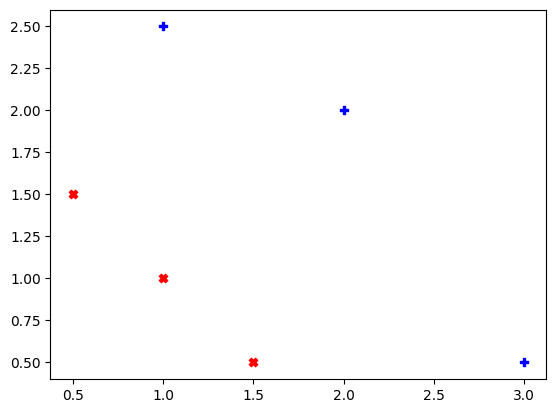

In [3]:
mask = (y==0)
plt.scatter(X[mask,0],X[mask,1],c='r',marker='X')
plt.scatter(X[~mask,0],X[~mask,1],c='b',marker='P')
plt.show()

### Fit the model

The code below imports the [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) from scikit-learn. As with linear regression, we first create an instance of the model with `LogisticRegression` and then fit this model on the training data by calling the `fit` function.

In [4]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

### Let's take a look at the decision boundary
This is the equation of the decision boundary.

In [5]:
coefs = np.concatenate((lr_model.intercept_,lr_model.coef_),axis=None)
print(f'model coefficients: {coefs}')
print(f'{coefs[0]:.3f} + {coefs[1]:.3f}x + {coefs[2]:.3f}y = 0')

model coefficients: [-2.33  0.9   0.74]
-2.334 + 0.904x + 0.736y = 0


#### Let's visualize the model and training data.

Plot the training data (using different colors for the two classes) and the decision boundary (in black).

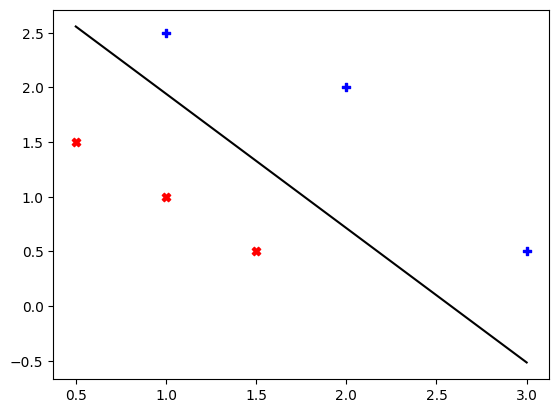

In [6]:
mask = (y==0)
plt.scatter(X[mask,0],X[mask,1],c='r',marker='X')
plt.scatter(X[~mask,0],X[~mask,1],c='b',marker='P')
xrange = np.array([min(X[:,0]), max(X[:,0])])
plt.plot(xrange, (-coefs[1]*xrange-coefs[0])/coefs[2],'k')
plt.show()

### Make Predictions

You can see the predictions made by this model by calling the `predict` function.

In [7]:
y_pred = lr_model.predict(X)
print("Prediction on training set:", y_pred)
print("True labels of training set:",y)

Prediction on training set: [0 0 0 1 1 1]
True labels of training set: [0 0 0 1 1 1]


### Calculate accuracy

You can calculate the accuracy of this model by calling the `score` function.

In [8]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0


## Let's try it on the iris dataset you used in homework 2.

Let's load the training data from `~jupyter-mlopez/data/iris.csv` into a pandas frame. Recall that each sample consists of four numeric features and a target (the class label) as follows: 0=setosa, 1=versicolor, 2=virginica.

In [10]:
import pandas as pd
iris_df = pd.read_csv('iris.csv')
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

You will build several binary classifiers. Let's start with Iris Setosa vs. Iris Virginica. Let's create a new data frame consisting of the relevant rows

In [11]:
iris02_df = iris_df[iris_df['target'] != 1]
iris02_df.reset_index(drop=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2


**Exercise.** Using Scikit-Learn build a classifier for disinguishing between *Iris Setosa* and *Iris Virginica*. Print the equation for the decision boundary and estimate the accuracy of your model. Remember to print the coefficients as well as the accuracy of the model. How does this model compare with the one you computed in Homework 2?

In [14]:
# Your code here.
X = iris02_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].to_numpy()
y = iris02_df['target'].to_numpy()
y = y - 1
lr_model02 = LogisticRegression()
lr_model02.fit(X, y)
coefs = np.concatenate((lr_model02.intercept_,lr_model02.coef_),axis=None)
print(f'model coefficients: {coefs}')
print("Accuracy on training set:", lr_model02.score(X, y))

model coefficients: [-6.86  0.37 -0.61  1.67  1.17]
Accuracy on training set: 1.0


**Exercise.** Repeat the previous exercise, but this time using a model to distinguish between *Iris Versicolor* (class label=1) vs. *Iris Virginica* (target=2). Remember to print the coefficients as well as the accuracy of the model. How does this model compare with the one you computed in Homework 2?

In [12]:
# Your code here.
iris12_df = iris_df[iris_df['target'] != 0]
X = iris12_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].to_numpy()
y = iris12_df['target'].to_numpy()
y = 2*y - 3  # map labels to -1 and +1
lr_model12 = LogisticRegression()
lr_model12.fit(X, y)
coefs = np.concatenate((lr_model12.intercept_,lr_model12.coef_),axis=None)
print(f'model coefficients: {coefs}')
print("Accuracy on training set:", lr_model12.score(X, y))

model coefficients: [-11.83  -0.36  -0.57   2.32   2.65]
Accuracy on training set: 0.96
